<a href="https://colab.research.google.com/github/Betul9/pantograph/blob/main/pantograph_object_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
import torch
from PIL import Image

import pandas as pd
from xml.dom import minidom
import csv

In [ ]:
fileList = glob.glob('/content/drive/MyDrive/model_ep*.pth')
for file in fileList:
  os.remove(file)

In [ ]:
os.chdir(r'/content/drive/MyDrive/DATASET/labels')
myFiles = glob.glob('*.txt')
print(myFiles)

myImageFiles = [w.replace('txt', 'jpg') for w in myFiles]
print(myImageFiles)

['frame0.txt', 'frame1.txt', 'frame2.txt', 'frame3.txt', 'frame4.txt', 'frame5.txt', 'frame6.txt', 'frame7.txt', 'frame8.txt', 'frame9.txt', 'frame10.txt', 'frame11.txt', 'frame12.txt', 'frame13.txt', 'frame14.txt', 'frame15.txt', 'frame16.txt', 'frame17.txt', 'frame18.txt', 'frame19.txt', 'frame20.txt', 'frame21.txt', 'frame22.txt', 'frame23.txt', 'frame24.txt', 'frame25.txt', 'frame26.txt', 'frame27.txt', 'frame28.txt', 'frame29.txt', 'frame30.txt', 'frame31.txt', 'frame32.txt', 'frame33.txt', 'frame34.txt', 'frame35.txt', 'frame36.txt', 'frame37.txt', 'frame38.txt', 'frame39.txt', 'frame40.txt', 'frame41.txt', 'frame42.txt', 'frame43.txt', 'frame44.txt', 'frame45.txt', 'frame46.txt', 'frame47.txt', 'frame48.txt', 'frame49.txt', 'frame50.txt', 'frame51.txt', 'frame52.txt', 'frame53.txt', 'frame54.txt', 'frame55.txt', 'frame56.txt', 'frame57.txt', 'frame58.txt', 'frame59.txt', 'frame193.txt', 'frame194.txt', 'frame195.txt', 'frame196.txt', 'frame197.txt', 'frame198.txt', 'frame199.txt

In [ ]:
pip install pybboxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pybboxes as pbx
width=256
height=256
final_df=[]
for item, myname in zip(myFiles, myImageFiles):
    row=[]
    bbox_temp=[]
    with open(item, 'rt') as fd:
        first_line = fd.readline()
        splited = first_line.split();
        
        row.append(myname)
        row.append(width)
        row.append(height)

        #format değişimi
        row.append(float(splited[0]))
        yoloboxes = (float(splited[1]), float(splited[2]), float(splited[3]), float(splited[4]))
        newboxes = pbx.convert_bbox(yoloboxes, from_type="yolo", to_type="voc", image_size=(256,256))

        row.append(newboxes[0])
        row.append(newboxes[1])
        row.append(newboxes[2])
        row.append(newboxes[3])
        final_df.append(row)

df = pd.DataFrame(final_df,columns=['filename', 'width', 'height','class_num','xmin','ymin','xmax','ymax'])
os.chdir(r'/content/drive/MyDrive')
df.to_csv("/content/drive/MyDrive/DATASET/saved3.csv",index=False)

In [ ]:
def preprocess_dataset():
  labels = []
  boxes = []
  img_list = []

  image_dir = '/content/drive/MyDrive/DATASET/images'

  with open('/content/drive/MyDrive/DATASET/saved3.csv') as csvfile:
      rows = csv.reader(csvfile)
      columns = next(iter(rows))
      for row in rows:
        labels.append(float(row[3]))
        #Scaling Coordinates to the range of [0,1] by dividing the coordinate with image size, 256 here.
        arr = [float(row[4])/256,  
               float(row[5])/256,
               float(row[6])/256,
               float(row[7])/256]
        
        boxes.append(arr)
        img_path = row[0]
        # Read the image
        img  = cv2.imread(os.path.join(image_dir,img_path))

        # Resize all images to a fix size
        image = cv2.resize(img,(256,256))

        # # Convert the image from BGR to RGB as NasNetMobile was trained on RGB images
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Normalize the image by dividing it by 255.0 
        image = image.astype("float") / 255.0

        # Append it to the list of images
        img_list.append(image)
 
  return labels, boxes, img_list

In [ ]:
image_size = 256
# Get Augmented images and bounding boxes
labels, boxes, img_list = preprocess_dataset()

39.0 19.0 79.0 54.0


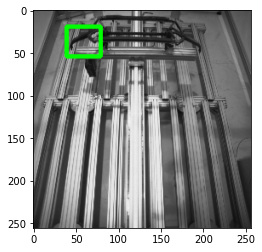

In [ ]:
# image = cv2.imread(r'/content/drive/MyDrive/horn_dataset/images/train/frame0.jpg')
x1,y1,x2,y2 = boxes[1]
image = img_list[1]
x1 = x1 * 256
x2 = x2 * 256
y1 = y1 * 256
y2 = y2 * 256
print(x1,y1,x2,y2)
cv2.rectangle(image, (int(x2),int(y2)),(int(x1),int(y1)),(0,255,0),3);
plt.imshow(image)

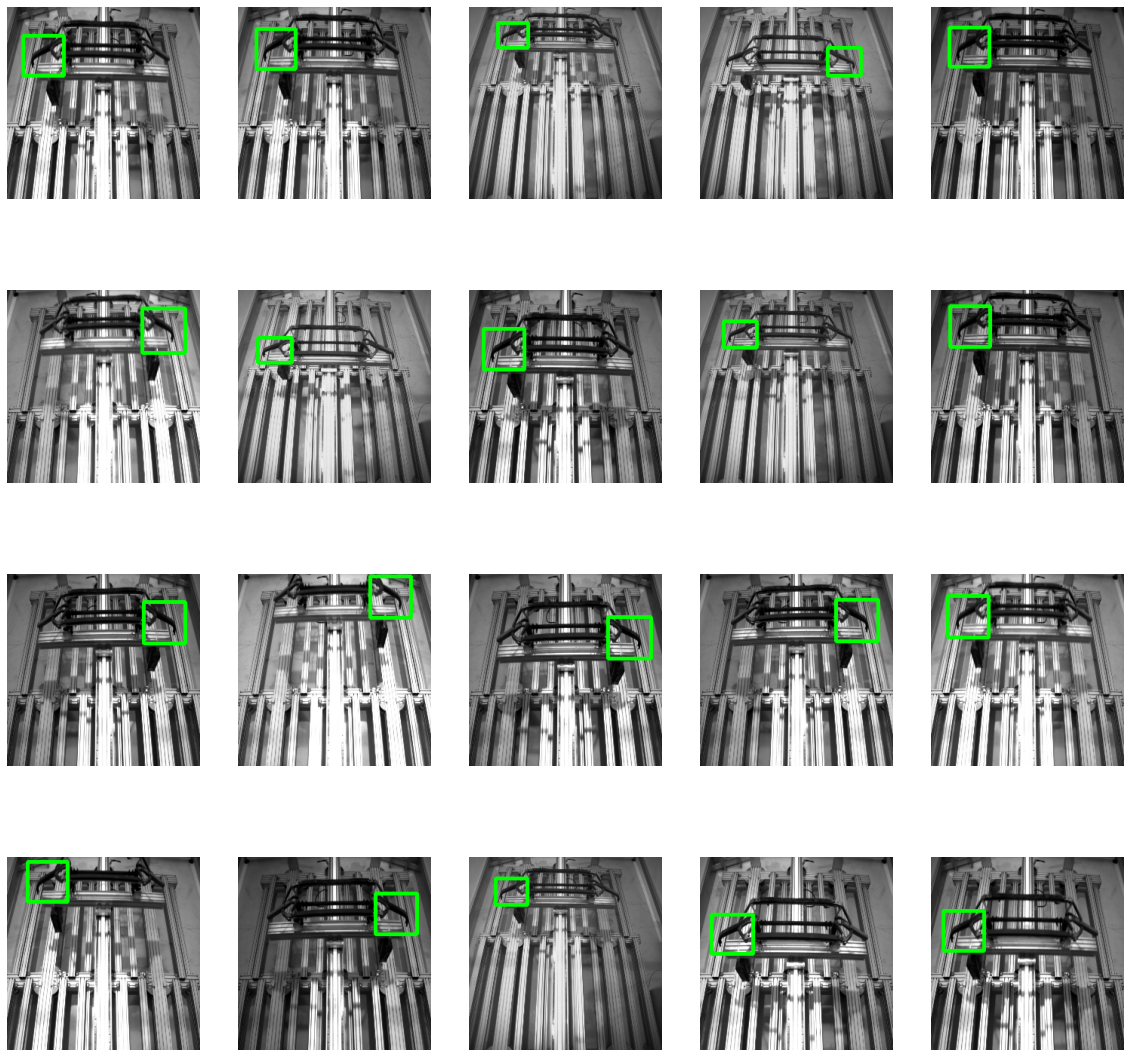

In [ ]:
# Create a Matplotlib figure
plt.figure(figsize=(20,20));

# Generate a random sample of images each time the cell is run 
random_range = random.sample(range(1, len(img_list)), 20)

for itr, i in enumerate(random_range, 1):

    # Bounding box of each image
    a1, b1, a2, b2 = boxes[i];
    img_size = 256

    # Rescaling the boundig box values to match the image size
    x1 = a1 * img_size
    x2 = a2 * img_size
    y1 = b1 * img_size
    y2 = b2 * img_size

    # The image to visualize
    image = img_list[i]

    # Draw bounding boxes on the image
    cv2.rectangle(image, (int(x1),int(y1)),
          (int(x2),int(y2)),
                  (0,255,0),
                  3);
    
    # Clip the values to 0-1 and draw the sample of images
    img = np.clip(img_list[i], 0, 1)
    plt.subplot(4, 5, itr);
    plt.imshow(img);
    plt.axis('off');

In [ ]:
# Split the data of images, labels and their annotations
train_images, val_images, train_labels, \
val_labels, train_boxes, val_boxes = train_test_split( np.array(img_list), 
                np.array(labels), np.array(boxes), test_size = 0.2, 
                random_state = 43)

print('Training Images Count: {}, Validation Images Count: {}'.format(
    len(train_images), len(val_images) ))

Training Images Count: 308, Validation Images Count: 78


In [6]:
from PIL import Image
import torch
from torchvision import ops
import torchvision
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf

import os
import pickle
import random
import time

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
class Dataset():
    def __init__(self, train_images, train_labels, train_boxes):
        self.images = torch.permute(torch.from_numpy(train_images),(0,3,1,2)).float()
        self.labels = torch.from_numpy(train_labels).type(torch.LongTensor)
        self.boxes = torch.from_numpy(train_boxes).float()
        print(self.boxes)
    def __len__(self):
        return len(self.labels)

    # To return x,y values in each iteration over dataloader as batches.

    def __getitem__(self, idx):
        return (self.images[idx],
              self.labels[idx],
              self.boxes[idx])

# Inheriting from Dataset class

class ValDataset(Dataset):

    def __init__(self, val_images, val_labels, val_boxes):

        self.images = torch.permute(torch.from_numpy(val_images),(0,3,1,2)).float()
        self.labels = torch.from_numpy(val_labels).type(torch.LongTensor)
        self.boxes = torch.from_numpy(val_boxes).float()

In [ ]:
dataset = Dataset(train_images, train_labels, train_boxes)
print(train_boxes)
valdataset = ValDataset(val_images, val_labels, val_boxes)

tensor([[0.0742, 0.2227, 0.2812, 0.4336],
        [0.1055, 0.0234, 0.3125, 0.2305],
        [0.0898, 0.1055, 0.3008, 0.3203],
        ...,
        [0.6914, 0.0547, 0.8945, 0.2656],
        [0.7344, 0.3438, 0.9531, 0.5625],
        [0.7266, 0.2930, 0.9570, 0.5117]])
[[0.07421875 0.22265625 0.28125    0.43359375]
 [0.10546875 0.0234375  0.3125     0.23046875]
 [0.08984375 0.10546875 0.30078125 0.3203125 ]
 ...
 [0.69140625 0.0546875  0.89453125 0.265625  ]
 [0.734375   0.34375    0.953125   0.5625    ]
 [0.7265625  0.29296875 0.95703125 0.51171875]]


In [7]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        # CNNs for rgb images
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5)
        self.conv4 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=5)
        self.conv5 = nn.Conv2d(in_channels=48, out_channels=192, kernel_size=5)


        # Connecting CNN outputs with Fully Connected layers for classification
        self.class_fc1 = nn.Linear(in_features=1728, out_features=240)
        self.class_fc2 = nn.Linear(in_features=240, out_features=120)
        self.class_out = nn.Linear(in_features=120, out_features=1)

        # Connecting CNN outputs with Fully Connected layers for bounding box
        self.box_fc1 = nn.Linear(in_features=1728, out_features=240)
        self.box_fc2 = nn.Linear(in_features=240, out_features=120)
        self.box_out = nn.Linear(in_features=120, out_features=4)


    def forward(self, t):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv3(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv4(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv5(t)
        t = F.relu(t)
        t = F.avg_pool2d(t, kernel_size=4, stride=2)

        t = torch.flatten(t,start_dim=1)
        

        class_t = self.class_fc1(t)
        class_t = F.relu(class_t)

        class_t = self.class_fc2(class_t)
        class_t = F.relu(class_t)

        class_t = F.softmax(self.class_out(class_t),dim=1)

        box_t = self.box_fc1(t)
        box_t = F.relu(box_t)

        box_t = self.box_fc2(box_t)
        box_t = F.relu(box_t)

        box_t = self.box_out(box_t)
        box_t = F.sigmoid(box_t)

        return [class_t,box_t]

In [11]:
model = Network()
model = model.to(device)

In [ ]:
def get_num_correct(preds, labels):
    return torch.round(preds).argmax(dim=1).eq(labels).sum().item()

In [ ]:
print(dataset.boxes)
dataloader = torch.utils.data.DataLoader(
       dataset, batch_size=8, shuffle=True)
print(dataloader)
valdataloader = torch.utils.data.DataLoader(
       valdataset, batch_size=8, shuffle=True)

tensor([[0.0742, 0.2227, 0.2812, 0.4336],
        [0.1055, 0.0234, 0.3125, 0.2305],
        [0.0898, 0.1055, 0.3008, 0.3203],
        ...,
        [0.6914, 0.0547, 0.8945, 0.2656],
        [0.7344, 0.3438, 0.9531, 0.5625],
        [0.7266, 0.2930, 0.9570, 0.5117]])


In [ ]:
# def train(model):
#     # optimizer = optim.SGD(model.parameters(),lr = 0.1)
#     optimizer = optim.Adam(model.parameters(),lr = 0.1)

#     total=1
#     num_of_epochs = 3
#     epochs = []
#     losses = []

#     os.mkdir('/content/drive/MyDrive/models')
#     for epoch in range(num_of_epochs):
#         tot_loss = 0
#         tot_correct = 0
#         train_start = time.time()
#         model.train()
#         for batch, (x, y, z) in enumerate(dataloader):
#             x,y,z = x.to(device),y.to(device),z.to(device)
#             [y_pred,z_pred]= model(x)
#             print(float(z_pred[0][0]))
#             loss = F.l1_loss(z_pred,z, reduction="none").sum(1)
#             loss = loss.sum()

#             optimizer.zero_grad()

#             loss.backward()
#             # class_loss = F.cross_entropy(y_pred, y)
#             # box_loss = F.mse_loss(z_pred, z)
#             # (box_loss + class_loss).backward()

#             tot_loss += loss.item()
#             total +=batch
#             train_loss = tot_loss/total

#             optimizer.step()

#             print("Train batch:", batch+1, " epoch: ", epoch, " ",
#                   (time.time()-train_start)/60, end='\r')

#         model.eval()
#         for batch, (x, y,z) in enumerate(valdataloader):
#             x,y,z = x.to(device),y.to(device),z.to(device)
#             # optimizer.zero_grad()
#             [y_pred,z_pred]= model(x)
#                 # class_loss = F.cross_entropy(y_pred, y)
#                 # box_loss = F.mse_loss(z_pred, z)
#             loss = F.l1_loss(z_pred,z, reduction="none").sum(1)
#             loss = loss.sum()
#             # tot_loss += (class_loss.item() + box_loss.item())
#             tot_loss += loss.item()
            
#             _, pred = torch.max(y_pred,1)
#             tot_correct += pred.eq(y).sum().item()
#             # tot_correct += get_num_correct(y_pred, y)

#             print("Test batch:", batch+1, " epoch: ", epoch, " ",
#                   (time.time()-train_start)/60, end='\r')
#         epochs.append(epoch)
#         losses.append(tot_loss)

#         # print("Epoch", epoch, "Accuracy", (tot_correct)/2.4, "loss:",
#         print("Epoch", epoch, "Accuracy", tot_correct/total, "loss:",
#               tot_loss/total, " time: ", (time.time()-train_start)/60, " mins")
#         torch.save(model.state_dict(), "/content/drive/MyDrive/models/model_ep"+str(epoch+1)+".pth")

In [ ]:
def train(model):
    # Defining the optimizer
    optimizer = optim.SGD(model.parameters(),lr = 0.1)
    num_of_epochs = 100
    epochs = []
    losses = []
    total_iou =0
    # Creating a directory for storing models
    os.mkdir('/content/drive/MyDrive/DATASET/models')
    for epoch in range(num_of_epochs):
        tot_loss = 0
        tot_correct = 0
        train_start = time.time()
        model.train()
        for batch, (x, y, z) in enumerate(dataloader):
        	# Converting data from cpu to GPU if available to improve speed
            x,y,z = x.to(device),y.to(device),z.to(device)
            # Sets the gradients of all optimized tensors to zero
            optimizer.zero_grad()
            [y_pred,z_pred]= model(x)
            # Compute loss (here CrossEntropyLoss)
            class_loss = F.cross_entropy(y_pred, y)
            box_loss = F.mse_loss(z_pred, z)
            box_loss.backward()
            # class_loss.backward()
            optimizer.step()
            print("Train batch:", batch+1, " epoch: ", epoch, " ",
                  (time.time()-train_start)/60, end='\r')

        model.eval()
        for batch, (x, y,z) in enumerate(valdataloader):
        	# Converting data from cpu to GPU if available to improve speed	
            x,y,z = x.to(device),y.to(device),z.to(device)
            # Sets the gradients of all optimized tensors to zero
            optimizer.zero_grad()
            with torch.no_grad():
                [y_pred,z_pred]= model(x)
                
                # Compute loss (here CrossEntropyLoss)
                class_loss = F.cross_entropy(y_pred, y)
                box_loss = F.mse_loss(z_pred, z)
                # Compute loss (here CrossEntropyLoss)

                iou = ops.box_iou(z,z_pred)
                total_iou = iou.cpu().data.numpy()[0][0]

            tot_loss += box_loss.item()
            tot_correct += get_num_correct(y_pred, y)
            print("Test batch:", batch+1, " epoch: ", epoch, " ",
                  (time.time()-train_start)/60, end='\r')
        epochs.append(epoch)
        losses.append(tot_loss)
        print("Epoch", epoch, "Accuracy", total_iou, "loss:",
              tot_loss, " time: ", (time.time()-train_start)/60, " mins")
    torch.save(model.state_dict(), "/content/drive/MyDrive/DATASET/models/model_ep"+str(epoch+1)+".pth")

In [ ]:
import shutil

shutil.rmtree('/content/drive/MyDrive/DATASET/models')

# import os

# directory = "/content/drive/MyDrive"
# test = os.listdir(directory)

# for item in test:
#     if item.endswith(".pth"):
#         os.remove( os.path.join( directory, item ) )


In [ ]:
train(model)

Epoch 0 Accuracy 0.0 loss: 0.7878634259104729  time:  0.00942775011062622  mins
Epoch 1 Accuracy 0.0 loss: 0.7126195579767227  time:  0.00808175802230835  mins
Epoch 2 Accuracy 0.0 loss: 0.6572610437870026  time:  0.008443935712178548  mins
Epoch 3 Accuracy 0.0 loss: 0.6107992343604565  time:  0.008131611347198486  mins
Epoch 4 Accuracy 0.0 loss: 0.5485215000808239  time:  0.008441615104675292  mins
Epoch 5 Accuracy 0.0 loss: 0.5129989646375179  time:  0.008343096574147542  mins
Epoch 6 Accuracy 0.040596392 loss: 0.5016362331807613  time:  0.00848015546798706  mins
Epoch 7 Accuracy 0.0 loss: 0.5206312388181686  time:  0.00829164981842041  mins
Epoch 8 Accuracy 0.0 loss: 0.49530139565467834  time:  0.008203399181365967  mins
Epoch 9 Accuracy 0.0 loss: 0.5225691720843315  time:  0.008386747042338053  mins
Epoch 10 Accuracy 0.0 loss: 0.5035468451678753  time:  0.00824664036432902  mins
Epoch 11 Accuracy 0.0 loss: 0.4880818538367748  time:  0.00847872495651245  mins
Epoch 12 Accuracy 0.0 l

In [1]:
def preprocess(img, image_size = 256):
    
    image = cv2.resize(img, (image_size, image_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float") / 255.0 

    # Expand dimensions as predict expect image in batches
    image = np.expand_dims(image, axis=0) 
    return image

In [2]:
def postprocess(image, results):

    # Split the results into class probabilities and box coordinates
    [class_probs, bounding_box] = results

    # First let's get the class label

    # The index of class with the highest confidence is our target class
    class_index = torch.argmax(class_probs)
  
    # Use this index to get the class name.
    class_label = 0

    # Now you can extract the bounding box too.

    # Get the height and width of the actual image
    h, w = 800,800

    # Extract the Coordinates
    x1, y1, x2, y2 = bounding_box[0]

    # # Convert the coordinates from relative (i.e. 0-1) to actual values
    x1 = int(w * x1)
    x2 = int(w * x2)
    y1 = int(h * y1)
    y2 = int(h * y2)

    # return the lable and coordinates
    return class_label, (x1,y1,x2,y2),torch.max(class_probs)*100

In [3]:
# We will use this function to make prediction on images.
def predict(image,  scale = 0.5):
  model = Network()
  model = model.to(device)
  model.load_state_dict(torch.load("/content/drive/MyDrive/DATASET/models/model_ep100.pth"))
  model.eval()
  
  # Reading Image
  img  = cv2.imread(image)
  
  # # Before we can make a prediction we need to preprocess the image.
  processed_image = preprocess(img)

  result = model(torch.permute(torch.from_numpy(processed_image).float(),(0,3,1,2)).to(device))

  # After postprocessing, we can easily use our results
  label, (x1, y1, x2, y2), confidence = postprocess(image, result)

  # Now annotate the image
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 100), 2)
  cv2.putText(
      img, 
      '{}, CONFIDENCE: {}'.format(label, confidence), 
      (30, int(35 * scale)), 
      cv2.FONT_HERSHEY_COMPLEX, scale,
      (200, 55, 100),
      2
      )

  # Show the Image with matplotlib
  plt.figure(figsize=(10,10))
  plt.imshow(img[:,:,::-1])

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


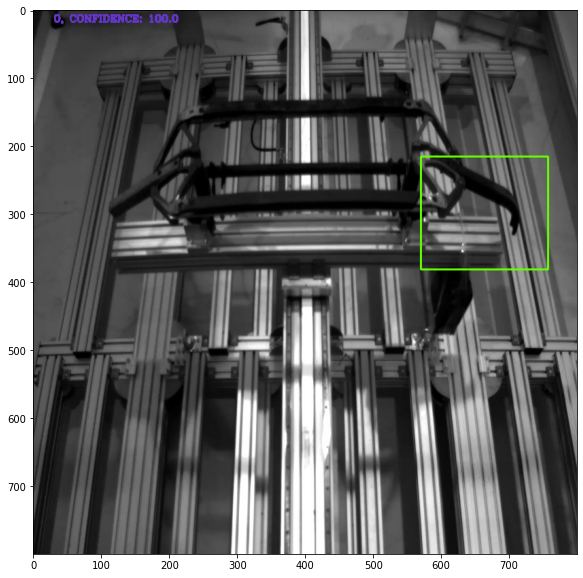

In [14]:
# image = '/content/drive/MyDrive/augmented_dataset/images/frame374.jpg'
image = '/content/drive/MyDrive/augmented_dataset/images/frame300.jpg'

predict(image)